<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-relevant-libraries" data-toc-modified-id="Import-relevant-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import relevant libraries</a></span></li><li><span><a href="#Collecting-data" data-toc-modified-id="Collecting-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Collecting data</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#About-the-Data" data-toc-modified-id="About-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>About the Data</a></span></li></ul></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><span><a href="#World-University-Rankings" data-toc-modified-id="World-University-Rankings-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>World University Rankings</a></span><ul class="toc-item"><li><span><a href="#timesData.csv." data-toc-modified-id="timesData.csv.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span><strong><code>timesData.csv</code></strong>.</a></span></li></ul></li><li><span><a href="#“American-University-Data”-IPEDS" data-toc-modified-id="“American-University-Data”-IPEDS-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>“American University Data” IPEDS</a></span></li><li><span><a href="#Startup-Founder-Valuations" data-toc-modified-id="Startup-Founder-Valuations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Startup Founder Valuations</a></span></li></ul></li><li><span><a href="#Meaningful-Questions" data-toc-modified-id="Meaningful-Questions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Meaningful Questions</a></span></li><li><span><a href="#Analyzing-Data-to-Answer-the-Questions" data-toc-modified-id="Analyzing-Data-to-Answer-the-Questions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing Data to Answer the Questions</a></span><ul class="toc-item"><li><span><a href="#How-the-US's-top-universities-are-distributed-(ranking-in-2016)?" data-toc-modified-id="How-the-US's-top-universities-are-distributed-(ranking-in-2016)?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>How the US's top universities are distributed (ranking in 2016)?</a></span><ul class="toc-item"><li><span><a href="#Preprocess-the-data" data-toc-modified-id="Preprocess-the-data-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Preprocess the data</a></span><ul class="toc-item"><li><span><a href="#IPEDS_data.xlsx" data-toc-modified-id="IPEDS_data.xlsx-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span><strong><code>IPEDS_data.xlsx</code></strong></a></span></li><li><span><a href="#timesData.csv" data-toc-modified-id="timesData.csv-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span><code>timesData.csv</code></a></span></li></ul></li><li><span><a href="#Analyze-the-data" data-toc-modified-id="Analyze-the-data-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Analyze the data</a></span><ul class="toc-item"><li><span><a href="#Filter-out-the-desirable-data" data-toc-modified-id="Filter-out-the-desirable-data-5.1.2.1"><span class="toc-item-num">5.1.2.1&nbsp;&nbsp;</span>Filter out the desirable data</a></span></li><li><span><a href="#Merge-the-data" data-toc-modified-id="Merge-the-data-5.1.2.2"><span class="toc-item-num">5.1.2.2&nbsp;&nbsp;</span>Merge the data</a></span></li><li><span><a href="#Visualize-the-data-by-using-Geoplot" data-toc-modified-id="Visualize-the-data-by-using-Geoplot-5.1.2.3"><span class="toc-item-num">5.1.2.3&nbsp;&nbsp;</span>Visualize the data by using Geoplot</a></span></li></ul></li><li><span><a href="#Answer-the-subquestions" data-toc-modified-id="Answer-the-subquestions-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Answer the subquestions</a></span><ul class="toc-item"><li><span><a href="#Will-do-schools-cluster-together-or-scatter-around?" data-toc-modified-id="Will-do-schools-cluster-together-or-scatter-around?-5.1.3.1"><span class="toc-item-num">5.1.3.1&nbsp;&nbsp;</span>Will do schools cluster together or scatter around?</a></span></li><li><span><a href="#Does-the-location-affect-number-of-students-and-ratio-of-international-students?" data-toc-modified-id="Does-the-location-affect-number-of-students-and-ratio-of-international-students?-5.1.3.2"><span class="toc-item-num">5.1.3.2&nbsp;&nbsp;</span>Does the location affect number of students and ratio of international students?</a></span></li></ul></li></ul></li><li><span><a href="#Do-founders-of-unicorn-startup-come-only-from-top-universities-(2016)?" data-toc-modified-id="Do-founders-of-unicorn-startup-come-only-from-top-universities-(2016)?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Do founders of unicorn startup come only from top universities (2016)?</a></span><ul class="toc-item"><li><span><a href="#Preprocess-the-data" data-toc-modified-id="Preprocess-the-data-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Preprocess the data</a></span><ul class="toc-item"><li><span><a href="#startup_founder_chars.csv" data-toc-modified-id="startup_founder_chars.csv-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span><code>startup_founder_chars.csv</code></a></span></li><li><span><a href="#timesData.csv" data-toc-modified-id="timesData.csv-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span><code>timesData.csv</code></a></span></li></ul></li><li><span><a href="#Analyze-the-data" data-toc-modified-id="Analyze-the-data-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Analyze the data</a></span><ul class="toc-item"><li><span><a href="#Filter-out-the-desirable-data" data-toc-modified-id="Filter-out-the-desirable-data-5.2.2.1"><span class="toc-item-num">5.2.2.1&nbsp;&nbsp;</span>Filter out the desirable data</a></span></li><li><span><a href="#Find-the-top-20-universities-that-graduate-most-founders" data-toc-modified-id="Find-the-top-20-universities-that-graduate-most-founders-5.2.2.2"><span class="toc-item-num">5.2.2.2&nbsp;&nbsp;</span>Find the top 20 universities that graduate most founders</a></span></li><li><span><a href="#Get-the-performance-score-for-each-school-in-the-top-20-universities" data-toc-modified-id="Get-the-performance-score-for-each-school-in-the-top-20-universities-5.2.2.3"><span class="toc-item-num">5.2.2.3&nbsp;&nbsp;</span>Get the performance score for each school in the top 20 universities</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-5.2.2.4"><span class="toc-item-num">5.2.2.4&nbsp;&nbsp;</span>Visualize the data</a></span></li></ul></li><li><span><a href="#Answer-the-question" data-toc-modified-id="Answer-the-question-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Answer the question</a></span><ul class="toc-item"><li><span><a href="#What-are-the-characteristics-of-these-universities?" data-toc-modified-id="What-are-the-characteristics-of-these-universities?-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>What are the characteristics of these universities?</a></span></li><li><span><a href="#What-is-the-most-common-major-in-these-universities?" data-toc-modified-id="What-is-the-most-common-major-in-these-universities?-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>What is the most common major in these universities?</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Import relevant libraries

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
from shapely.geometry import Point
from thefuzz import process

import warnings
warnings.filterwarnings("ignore")

D:\Apps\Anaconda\FULL\envs\min_ds-env\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Collecting data
### Introduction
<font color='#110066'><b>University Ranking</b></font> is the main subject of this project. Hence, we looked for public datasets that are relevant to this subject and found out 3 interested datasets on <a href='https://www.kaggle.com/'><font color='blue'><b>Kaggle</b></font></a>:
- [World University Rankings](https://www.kaggle.com/mylesoneill/world-university-rankings) by *Myles O'Neill*
- [“American University Data” IPEDS Dataset](https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset) by *Sumit Bhongale*
- [Startup Founder Valuations Dataset](https://www.kaggle.com/firmai/startup-founder-valuations-dataset) by *FirmAI*

<font color='red'><b>[!]</b></font> We mainly focus on the **World University Rankings** dataset and use the others as additional data to acquire more information relevant to universities.

### About the Data
- **World University Rankings**
> - License: `Data files © Original Authors`
> - Description: this dataset contains three global **university rankings** from very different places:
>   - [The Times Higher Education World University Ranking](https://www.timeshighereducation.com/content/world-university-rankings) is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.
>   - [The Academic Ranking of World Universities](http://www.shanghairanking.com/), also known as the *Shanghai Ranking*, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.
>   - [The Center for World University Rankings](https://cwur.org/), is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

- **“American University Data” IPEDS Dataset**
> - License: `CC0: Public Domain`
> - Description: **IPEDS** is the primary source of information on U.S Colleges, Universities, technical and vaccational institutions. Hence, this dataset has details about the *universities* and *colleges* in USA for year 2013. Moreover, this dataset also has **university details along with their geo locations**.

- **Startup Founder Valuations Dataset**
> - License: `Unknown`
> - Description: this dataset include data about startup validation, **startup founders and their universities**. It was uploaded in 2019 by FirmAI and there isn't any description or information about how this data was gathered.

## Exploring the data
In this section, we will only explore the datasets *just enough* to ask some meaningful questions. Moreover, as mentioned above, we will explore **World University Rankings** in detail. On the other hand, we only skim through and capture the gist of **“American University Data” IPEDS** and **Startup Founder Valuations**.

In each dataset, we will try to answer these following questions:
- How many rows and how many columns?
- What is the meaning of each row?
- What is the meaning of each column?
- What is the current data type of each column? Are there columns having inappropriate data types?
- Are there duplicated rows?
- What is the percentage of missing values of each column?

Let's begin with main character:  **World University Rankings**

###  World University Rankings
This dataset contains 6 tables:
- `timesData.csv`: the Times Higher Education World University Ranking
- `shanghaiData.csv`: the Academic Ranking of World Universities
- `cwurData.csv`: the Center for World University Rankings
- `school_and_country_table.csv`: a lookup table for university against country from the *timesData* file. This is to be used to populate country data for the shanghai rankings, which are missing countries.
- `education_expenditure_supplementary_data.csv`: this data contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product.
- `educational_attainment_supplementary_data.csv`: this data contains information about educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset

We will go through each data table in turn and explore them.

#### **`timesData.csv`**.

In [4]:
times_df = pd.read_csv('Data/timesData.csv') 
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [5]:
# Data summary
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {times_df.duplicated().sum()}')

# Percentage of missing values in each column
times_df.isna().sum() / times_df.shape[0] * 100

Number of duplicated rows: 0


world_rank                0.000000
university_name           0.000000
country                   0.000000
teaching                  0.000000
international             0.000000
research                  0.000000
citations                 0.000000
income                    0.000000
total_score               0.000000
num_students              2.266615
student_staff_ratio       2.266615
international_students    2.573953
female_male_ratio         8.951210
year                      0.000000
dtype: float64

With the above results, we draw some conclusions as follows:
- It has total **2603 rows** and **14 columns**. 
- Each row represents *a university*.
- Meaning of each column (according to description on Kaggle) and their current data types:
  - `world_rank` [**string**]: world rank for the university. $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `university_name` [**string**]: name of university
  - `country` [**string**]: country of university
  - `teaching` [**float**]: university score for teaching (the learning environment)
  - `international` [**string**]: university score international outlook (staff, students, research) $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `research` [**float**]: university score for research (volume, income and reputation)
  - `citations` [**float**]: university score for citations (research influence)
  - `income` [**string**]: university score for industry income (knowledge transfer) $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `total_score` [**string**]: total score for university, used to determine rank $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `num_students` [**string**]: number of students at the university $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `student_staff_ratio` [**float**]: Number of students divided by number of staff $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `international_students` [**string**]: Percentage of students who are international $\rightarrow$ this data type is <font color='red'>suspicious</font>.
  - `female_male_ratio`[**string**]: Female student to Male student ratio
  - `year`[**int**]: year of the ranking (2011 to 2016 included)
- There isn't any duplicated in this table.
- There are only 4 columns contain missing values in this table. 



### “American University Data” IPEDS
This dataset contains only one *xlsx* file named `IPEDS_data.xlsx`. This file contains 4 sheets, the first one is data sheet and the others are notes for this data. So, we just explore the first one.

In [7]:
IPEDS_df = pd.read_excel('Data/IPEDS_data.xlsx', sheet_name=0)
IPEDS_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [8]:
IPEDS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [9]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {IPEDS_df.duplicated().sum()}')

# Number of columns that have missing values
print(f'Number of columns that have missing values: {(IPEDS_df.isna().sum() > 0).sum()}')

Number of duplicated rows: 0
Number of columns that have missing values: 127


With the above results, we draw some conclusions as follows:
- It has total **1534 rows** and **145 columns**.
- Each row represents *a university*.
- This table has almost things you need to know about US universities, such as: geo location, degree offered, number of students, fee, etc.
- There isn't any duplicated in this table.
- There are **127/145** columns contain missing values in this table.

### Startup Founder Valuations
This dataset contains 2 files: `startup_founder_chars.csv` and `startup_valuation.csv`.

Let's explore the first one: `startup_founder_chars.csv`


In [10]:
founders_df = pd.read_csv('Data/startup_founder_chars.csv')
founders_df.head()

,Full Name,Primary Company,Previous startups?,Consulting before start-up,Standardized University,Standardized Major,Degree Type,Standardized Graduate Institution,Standardized Graduate Studies,Graduate Diploma,Ever served as TA/Teacher/Professor/Mentor?,Years of Employment,Worked as product manager/director/head/VP?,Worked at Google?,Worked at Microsoft?,Worked in Sales?,Stanford or Berkeley,Ivy League,Crunchbase,LinkedIn
0,Chad Hurley,YouTube,0.0,0.0,Indiana University of Pennsylvania,Design,NaN,NaN,NaN,NaN,0.0,4.0,1.0,1.0,0.0,0.0,0,0,https://www.crunchbase.com/person/chad-hurley,http://www.linkedin.com/profile/view?id=5711
1,Gwyneth Paltrow,Goop Inc.,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/gwyneth-paltrow,https://www.linkedin.com/in/gwyneth-paltrow-48...
2,Jason Calacanis,Inside.com,3.0,0.0,Fordham University,Psychology,BA,NaN,NaN,NaN,0.0,4.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/jason-calacanis,http://www.linkedin.com/in/jasoncalacanis
3,Tony Fadell,Nest Labs,1.0,0.0,University of Michigan,Computer Science,BS,NaN,NaN,NaN,0.0,18.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/tony-fadell,http://www.linkedin.com/pub/tony-fadell/0/1/380
4,Matt Mullenweg,Automattic,1.0,0.0,University of Houston,NaN,NaN,NaN,NaN,NaN,0.0,15.0,1.0,0.0,0.0,0.0,0,0,https://www.crunchbase.com/person/matt-mullenweg,http://www.linkedin.com/in/mattm


In [11]:
founders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Full Name                                    574 non-null    object 
 1   Primary Company                              574 non-null    object 
 2   Previous startups?                           574 non-null    float64
 3   Consulting before start-up                   574 non-null    float64
 4   Standardized University                      505 non-null    object 
 5   Standardized Major                           444 non-null    object 
 6   Degree Type                                  432 non-null    object 
 7   Standardized Graduate Institution            253 non-null    object 
 8   Standardized Graduate Studies                258 non-null    object 
 9   Graduate Diploma                             258 non-null    object 
 10  Ev

In [12]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {founders_df.duplicated().sum()}')

# Percentage of missing values in each column
founders_df.isna().sum() / times_df.shape[0] * 100

Number of duplicated rows: 0


Full Name                                       0.000000
Primary Company                                 0.000000
Previous startups?                              0.000000
Consulting before start-up                      0.000000
Standardized University                         2.650788
Standardized Major                              4.994237
Degree Type                                     5.455244
Standardized Graduate Institution              12.331925
Standardized Graduate Studies                  12.139839
Graduate Diploma                               12.139839
Ever served as TA/Teacher/Professor/Mentor?     0.038417
Years of Employment                             0.000000
Worked as product manager/director/head/VP?     0.000000
Worked at Google?                               0.000000
Worked at Microsoft?                            0.038417
Worked in Sales?                                0.038417
Stanford or Berkeley                            0.000000
Ivy League                     

With the above results, we draw some conclusions as follows:
- It has total **574 rows** and **20 columns**.
- Each row represents *a founder*.
- This table contains some interested information about startup founders, such as: university, major, years of employment, etc.
- There isn't any duplicated in this table.
- There are **10/20** columns contain missing values in this table.

Next, we move on to `startup_valuation.csv`

In [13]:
startups_df = pd.read_csv('Data/startup_valuations.csv')
startups_df.head()

,Full Name,Primary Company,Seed Valuation,A Valuation,B Valuation,Valuation Increase
0,Chad Hurley,YouTube,0,"14,000,000.00","88,400,000.00",6.314285714
1,Gwyneth Paltrow,Goop Inc.,0,"40,000,000.00","65,000,000.00",1.625
2,Jason Calacanis,Inside.com,"$7,000,000.00","11,250,000.00",0,#VALUE!
3,Tony Fadell,Nest Labs,"$2,700,000.00","49,210,000.00","288,120,000.00",5.854907539
4,Matt Mullenweg,Automattic,0,"8,650,000.00","238,590,000.00",27.58265896


In [14]:
# Data summary
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Full Name           1469 non-null   object
 1   Primary Company     1469 non-null   object
 2   Seed Valuation      1469 non-null   object
 3   A Valuation         1469 non-null   object
 4   B Valuation         1469 non-null   object
 5   Valuation Increase  1469 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB


In [15]:
# Count number of duplicated rows
print(f'Number of duplicated rows: {startups_df.duplicated().sum()}')

# Percentage of missing values in each column
startups_df.isna().sum() / times_df.shape[0] * 100

Number of duplicated rows: 1


Full Name             0.0
Primary Company       0.0
Seed Valuation        0.0
A Valuation           0.0
B Valuation           0.0
Valuation Increase    0.0
dtype: float64

With the above results, we draw some conclusions as follows:
- It has total **1469 rows** and **6 columns**.
- Each row represents *a startup*.
- This table contains information about funding rounds of each startup.
- There is a duplicated row in this table.
- Missing value in this table quite different! It can be `0` or `#VALUE!`

## Meaningful Questions
<font color='#110066'><b>How the US's top universities (2016) are distributed?</b></font>
- Subquestions:
  - Are schools clustered together or scattered around?
  - Does the location affect number of students and the ratio of international students?
- Benefits: helpful information for other universities to properly plan and construct their infrastructures.
- Used Data: 
  - **IPEDS_data.xlsx**: `Name`, `Longitude location of institution`, `Latitude location of institution`
  - **timesData.csv**: `university_name`, `country`, `international_students`, `total_score` and `year`.

<font color='#110066'><b>Do founders of unicorn startup come only from top universities (2016)?</b></font>
- Subquestions:
  - What are the characteristics of these universities?
  - What is the most common major in these universities?
- Benefits: helpful information for investors to invest in prospective startups and boards of universities to plan suitable programs for teaching students.
- Used Data:
  - **timesData.csv**: `university_name`, `country`, `teaching`, `international`, `research`, `citations`, `income`, `total_score`, and `year`
  - **startup_founder_chars.csv**: `Standardized University`, `Standardized Major`

## Analyzing Data to Answer the Questions
In this section, we preprocess the data, then analyze them and find out the answer for those questions.

Let's begin with the first question:
### How the US's top universities are distributed (ranking in 2016)?
Before diving into it, we need to sketch out what are we going to do:
- **Data that will be used and their expected data types**:
  - Dataset: **`IPEDS_data.xlsx`**, **`timesData.csv`**
  - Attributes and expected data types:
      - **`IPEDS_data.xlsx`**: 
        - `Name`: string
        - `Longitude location of institution`: float
        - `Latitude location of institution`: float
      - **`timesData.csv`**: 
        - `university_name`: string
        - `country`: string
        - `international_students`: float
        - `total_score`: float
        - `year`: string
- **General steps**:
  - Preprocess the data
    - Detect and handle inappropriate data types in each table.
    - Detect and handle missing values in each table.
    - Detect and handle outliers in each table.
  - Analyze the data
    - Filter out the desirable data: 2016 Times Ranking
    - Merge 2 tables by university names
    - Visualize the data by using Pointplot of Geoplot
  - Answer the question
    - Are schools clustered together or scattered around?
    - Does the location affect number of students and the ratio of international students?
      
#### Preprocess the data

##### **`IPEDS_data.xlsx`**

In [16]:
# Make a sub df from IPEDS
sub_IPEDS_df = IPEDS_df[['Name', 'Longitude location of institution', 'Latitude location of institution']].copy()
sub_IPEDS_df.head()

,Name,Longitude location of institution,Latitude location of institution
0,Alabama A & M University,-86.568502,34.783368
1,University of Alabama at Birmingham,-86.809170,33.502230
2,Amridge University,-86.174010,32.362609
3,University of Alabama in Huntsville,-86.638420,34.722818
4,Alabama State University,-86.295677,32.364317


In [17]:
# Data summary
sub_IPEDS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               1534 non-null   object 
 1   Longitude location of institution  1534 non-null   float64
 2   Latitude location of institution   1534 non-null   float64
dtypes: float64(2), object(1)
memory usage: 36.1+ KB


In [18]:
# Numerical columns
sub_IPEDS_df.describe()

,Longitude location of institution,Latitude location of institution
count,1534.000000,1534.000000
mean,-88.342338,38.729993
std,14.838804,4.832832
min,-158.062444,19.701854
25%,-94.576341,35.348340
50%,-84.514218,39.946096
75%,-77.207136,41.984929
max,-67.456534,64.857053


In [19]:
# Categorical data
sub_IPEDS_df['Name'].unique()

array(['Alabama A & M University', 'University of Alabama at Birmingham',
       'Amridge University', ..., 'Ottawa University-Online',
       'Providence Christian College',
       'Polytechnic University of Puerto Rico-Orlando'], dtype=object)

With the above results, we draw some conclusions as follows:
- These columns have data types as expected, so that we don't change anything here. 
- The values of *latitude* and *longitude* are normal. In particular, the numbers are in range from -90 to 90 for *latitude* and -180 to 180 for *longitude*.
- Some school names occur multiple times and there is no duplicated row $\rightarrow$ Some schools have the same name.

This data is really fine and we don't need to change or process anything. 
So, we move on to the next data table.

##### `timesData.csv`

In [20]:
# Make a sub df from timesData
sub_times_df = times_df[['university_name', 'country', 'international_students', 'num_students' ,'total_score', 'year']].copy()
sub_times_df.head()

,university_name,country,international_students,num_students,total_score,year
0,Harvard University,United States of America,25%,"20,152",96.1,2011
1,California Institute of Technology,United States of America,27%,"2,243",96.0,2011
2,Massachusetts Institute of Technology,United States of America,33%,"11,074",95.6,2011
3,Stanford University,United States of America,22%,"15,596",94.3,2011
4,Princeton University,United States of America,27%,"7,929",94.2,2011


In [21]:
# Data summary
sub_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   university_name         2603 non-null   object
 1   country                 2603 non-null   object
 2   international_students  2536 non-null   object
 3   num_students            2544 non-null   object
 4   total_score             2603 non-null   object
 5   year                    2603 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 122.1+ KB


In [22]:
# Percentage of missing values in each column
sub_times_df.isna().sum() / sub_times_df.shape[0] * 100

university_name           0.000000
country                   0.000000
international_students    2.573953
num_students              2.266615
total_score               0.000000
year                      0.000000
dtype: float64

There are two things we need to handle in this data:
- Inappropriate data types: `international_students` and `total_score` don't have the data types as expected. They should have *numerical* data type. $\rightarrow$ Change their data types to the correct ones (`float`).
- Missing values: `international_students` and `num_students` columns contain missing values. $\rightarrow$ The percent of missing values is kinda low, so we just drop these missing values from the table.

But, we need to take a closer look at data before going to process to make sure we have a proper strategy to process them.

In [23]:
sub_times_df['international_students'].unique()

array(['25%', '27%', '33%', '22%', '34%', '15%', '51%', '20%', '21%',
       '23%', '19%', '37%', '16%', '28%', '35%', '38%', '46%', '13%',
       '17%', '10%', '26%', '4%', '11%', '8%', '14%', '30%', '36%', '12%',
       nan, '54%', '2%', '7%', '18%', '1%', '24%', '9%', '29%', '5%',
       '6%', '47%', '39%', '40%', '31%', '48%', '32%', '44%', '3%', '0%',
       '43%', '63%', '52%', '50%', '82%', '42%'], dtype=object)

In [24]:
sub_times_df['num_students'].unique()

array(['20,152', '2,243', '11,074', '15,596', '7,929', '18,812', '19,919',
       '36,186', '15,060', '11,751', '38,206', '14,221', '15,128',
       '21,424', '18,178', '41,786', '66,198', '25,055', '20,376',
       '11,885', '19,835', '26,607', '44,020', '15,172', '18,334',
       '26,199', '19,967', '3,055', '22,020', '50,152', '26,518',
       '27,233', '42,727', '31,592', '31,326', '40,128', '40,148',
       '12,528', '2,429', '25,774', '11,385', '2,400', '14,604', '7,774',
       '25,581', nan, '6,333', '9,666', '26,614', '14,290', '12,161',
       '46,825', '10,410', '35,364', '8,653', '56,959', '22,809',
       '39,763', '24,789', '42,056', '12,338', '35,691', '11,829',
       '26,485', '9,259', '51,462', '29,325', '17,906', '17,404', '6,753',
       '41,868', '23,845', '20,771', '36,534', '7,867', '15,521',
       '21,394', '21,908', '9,027', '12,001', '34,718', '28,881',
       '25,674', '15,489', '34,938', '8,747', '28,251', '20,925',
       '26,583', '7,326', '23,823', '22,1

In [25]:
sub_times_df['total_score'].unique()

array(['96.1', '96.0', '95.6', '94.3', '94.2', '91.2', '91.1', '90.6',
       '89.5', '87.7', '86.9', '86.4', '83.9', '83.4', '82.0', '81.0',
       '79.5', '79.3', '79.2', '78.4', '78.0', '76.5', '75.9', '75.6',
       '75.3', '75.1', '75.0', '73.8', '73.2', '73.0', '72.9', '71.7',
       '71.0', '70.7', '69.9', '69.5', '69.2', '69.0', '68.6', '67.0',
       '66.9', '66.5', '66.0', '65.9', '65.6', '65.2', '65.0', '64.9',
       '64.7', '64.6', '64.2', '64.0', '63.9', '63.0', '62.8', '62.7',
       '62.2', '62.1', '61.6', '61.4', '61.2', '61.1', '60.7', '60.4',
       '60.3', '59.7', '59.6', '59.5', '59.1', '59.0', '58.9', '58.3',
       '58.0', '57.9', '57.8', '57.7', '57.6', '57.5', '57.3', '57.2',
       '57.1', '57.0', '56.9', '56.6', '56.5', '56.4', '56.3', '56.2',
       '56.1', '56.0', '55.6', '55.4', '55.3', '55.2', '55.1', '55.0',
       '54.8', '54.6', '54.5', '54.4', '54.3', '54.2', '54.0', '53.4',
       '53.3', '52.7', '52.6', '52.5', '52.4', '52.3', '52.2', '52.1',
      

As the result above, we can see a strange value (`-`) in set of values in `total_score` column. This value can be seen as the missing value. Because this question depends heavily on the accuracy of the `total_score` column values, we cannot fill in a random value here. So we'll just drop these values out of the table. Moreover, in `international_students` and `num_students` columns, we need to extract the numerical values before transforming their data types.

In [26]:
# Replace the strange value with missing value
sub_times_df.replace(to_replace={'total_score':'-'}, value=np.nan, inplace=True)

# Drop missing values
sub_times_df = sub_times_df.dropna()
sub_times_df.reset_index(drop=True, inplace=True)

# Percentage of missing values in each column
sub_times_df.isna().sum() / sub_times_df.shape[0] * 100

university_name           0.0
country                   0.0
international_students    0.0
num_students              0.0
total_score               0.0
year                      0.0
dtype: float64

In [27]:
# Transform total_score's data type
sub_times_df['total_score'] = pd.to_numeric(sub_times_df['total_score'])

# Transform international_studetns's data type
## Extract numerical values
sub_times_df['international_students'] = sub_times_df['international_students'].str.extract(r'(\d+)')
## Change data type
sub_times_df['international_students'] = pd.to_numeric(sub_times_df['international_students'])

# Transform num_students data type
## Remove ',' from the values
sub_times_df['num_students'] = sub_times_df['num_students'].str.replace(',', '')
## Change data type
sub_times_df['num_students'] = pd.to_numeric(sub_times_df['num_students'])

# Data summary
sub_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_name         1181 non-null   object 
 1   country                 1181 non-null   object 
 2   international_students  1181 non-null   int64  
 3   num_students            1181 non-null   int64  
 4   total_score             1181 non-null   float64
 5   year                    1181 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 55.5+ KB


Next, we need to make sure that there isn't any outlier in the remaining columns.

In [28]:
sub_times_df['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Turkey', 'Austria', 'Israel', 'Brazil',
       'Italy', 'Russian Federation', 'Luxembourg'], dtype=object)

In [29]:
sub_times_df['university_name'].unique()

array(['Harvard University', 'California Institute of Technology',
       'Massachusetts Institute of Technology', 'Stanford University',
       'Princeton University', 'University of Cambridge',
       'University of Oxford', 'University of California, Berkeley',
       'Imperial College London', 'Yale University',
       'University of California, Los Angeles', 'University of Chicago',
       'Johns Hopkins University', 'Cornell University',
       'ETH Zurich – Swiss Federal Institute of Technology Zurich',
       'University of Michigan', 'University of Toronto',
       'Columbia University', 'University of Pennsylvania',
       'Carnegie Mellon University', 'University of Hong Kong',
       'University College London', 'University of Washington',
       'Duke University', 'Northwestern University',
       'University of Tokyo', 'Georgia Institute of Technology',
       'Pohang University of Science and Technology',
       'University of California, Santa Barbara',
       'Universi

In [30]:
sub_times_df.describe()

,international_students,num_students,total_score,year
count,1181.000000,1181.000000,1181.000000,1181.000000
mean,19.627434,23908.447079,59.880017,2013.514818
std,10.174581,13628.873971,12.840617,1.705174
min,1.000000,462.000000,41.400000,2011.000000
25%,12.000000,14221.000000,50.200000,2012.000000
50%,18.000000,22616.000000,56.100000,2014.000000
75%,26.000000,31326.000000,66.200000,2015.000000
max,54.000000,127431.000000,96.100000,2016.000000


Cool, the ranges of these values are normal. Hence, it looks like there isn't any outlier in these columns. This data is clean enough to be fed for the next step.

#### Analyze the data
##### Filter out the desirable data
We need to filter the 2016 ranking and universities are in the US out of the `sub_times_df`.

In [31]:
times_US_2016_df = sub_times_df[(sub_times_df.year == 2016) & (sub_times_df.country == 'United States of America')]
times_US_2016_df.reset_index(drop=True, inplace=True)
times_US_2016_df.head()

,university_name,country,international_students,num_students,total_score,year
0,California Institute of Technology,United States of America,27,2243,95.2,2016
1,Stanford University,United States of America,22,15596,93.9,2016
2,Massachusetts Institute of Technology,United States of America,33,11074,92.0,2016
3,Harvard University,United States of America,25,20152,91.6,2016
4,Princeton University,United States of America,27,7929,90.1,2016


In [32]:
# Data summary
times_US_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_name         63 non-null     object 
 1   country                 63 non-null     object 
 2   international_students  63 non-null     int64  
 3   num_students            63 non-null     int64  
 4   total_score             63 non-null     float64
 5   year                    63 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.1+ KB


##### Merge the data
We have **63 universities** are in the US from the **2016 Times Ranking**. This set of universities must be a *subset of IPEDS universities*. Hence, after merging, we must get **63 universities**. If not, there is *inconsistency* in our data.

In [33]:
# Merge the data using university names
merged_df = pd.merge(left=times_US_2016_df, 
         right=sub_IPEDS_df, 
         left_on='university_name', 
         right_on='Name', 
         how='left',
         indicator=True
        )
merged_df

,university_name,country,international_students,num_students,total_score,year,Name,Longitude location of institution,Latitude location of institution,_merge
0,California Institute of Technology,United States of America,27,2243,95.2,2016,California Institute of Technology,-118.125740,34.139275,both
1,Stanford University,United States of America,22,15596,93.9,2016,Stanford University,-122.182212,37.431746,both
2,Massachusetts Institute of Technology,United States of America,33,11074,92.0,2016,Massachusetts Institute of Technology,-71.092115,42.360095,both
3,Harvard University,United States of America,25,20152,91.6,2016,Harvard University,-71.118177,42.374429,both
4,Princeton University,United States of America,27,7929,90.1,2016,Princeton University,-74.663708,40.348496,both
...,...,...,...,...,...,...,...,...,...,...
58,University of Utah,United States of America,9,25674,50.1,2016,University of Utah,-111.846044,40.762484,both
59,Brandeis University,United States of America,22,5495,49.9,2016,Brandeis University,-71.254716,42.364947,both
60,Arizona State University,United States of America,9,83236,49.7,2016,NaN,NaN,NaN,left_only
61,Boston College,United States of America,19,13216,49.6,2016,Boston College,-71.171488,42.337688,both


Unfortunately! The worst thing has occurred: **Data Inconsistency**. So, we have the following strategy to solve this issue:

- With each university name not in IPEDS data, we use *Levenshtein Distance* to calculate and find the most feasible in the IPEDS universities. To make it more simple, we use a built-in library called `TheFuzz` to do the job.
- Moreover, if the percentage of matching is *low than 95*, we need to make a check again.

In [34]:
# Prepare set of university names
school_names = set(sub_IPEDS_df['Name'].unique())

# Set of university names are not in IPEDS data
wrong_names = merged_df[merged_df['_merge']=='left_only']['university_name'].values
wrong_name_indices = merged_df[merged_df['_merge']=='left_only'].index

In [35]:
extracted_names = []
# With each wrong name, find the most feasible name in IPEDS data
for name in wrong_names:
    extracted_name = process.extractOne(name, school_names)
    extracted_names.append(extracted_name)
    print(extracted_name)

('University of California-Berkeley', 99)
('Columbia University in the City of New York', 90)
('University of California-Los Angeles', 99)
('University of Michigan-Ann Arbor', 95)
('University of Mary Washington', 95)
('University of California-San Diego', 99)
('University of California-Santa Barbara', 99)
('Georgia Institute of Technology-Main Campus', 95)
('University of California-Davis', 98)
('The University of Texas at Austin', 95)
('University of Minnesota-Crookston', 95)
('Pennsylvania State University-Main Campus', 95)
('University of Pittsburgh-Johnstown', 95)
('Ohio State University-Main Campus', 90)
('University of California-Irvine', 98)
('Indiana University-Purdue University-Fort Wayne', 90)
('University of Maryland-College Park', 99)
('Olivet Nazarene University', 86)
('University of Massachusetts-Amherst', 95)
('University of California-Santa Cruz', 99)
('University of Virginia-Main Campus', 90)
('University of California-Riverside', 99)
('Arizona State University-Tempe'

In [36]:
# List all the matches that lower than 95 percent
for idx, (name, ratio) in enumerate(extracted_names):
    if ratio < 95:
        print(f'Index: {idx}')
        print(f'Original name: {wrong_names[idx]}')
        print(f'Matching name: {name}\n')

Index: 1
Original name: Columbia University
Matching name: Columbia University in the City of New York

Index: 13
Original name: Ohio State University
Matching name: Ohio State University-Main Campus

Index: 15
Original name: Purdue University
Matching name: Indiana University-Purdue University-Fort Wayne

Index: 17
Original name: Rutgers, the State University of New Jersey
Matching name: Olivet Nazarene University

Index: 20
Original name: University of Virginia
Matching name: University of Virginia-Main Campus



There is only one ambiguous university name, is `Rutgers University`. In this case, **TheFuzz** may mistake `Rutgers University` for `State University`. Hence, we need to change it to the true one and find the most feasible name in the IPEDS data.

In [37]:
# Rename the Rutgers University
wrong_names[17] = 'Rutgers University'

# Find the most feasible name in IPEDS data
extracted_names[17] = process.extractOne(wrong_names[17], school_names)
extracted_names[17]

('Rutgers University-Newark', 95)

Perfection! Now, we change the whole wrong name to the correct one and merge the data again.

In [38]:
# Rename wrong names
true_names = [name[0] for name in extracted_names]
times_US_2016_df.iloc[wrong_name_indices, 0] = true_names

# Merge again
merged_df = pd.merge(left=times_US_2016_df, 
         right=sub_IPEDS_df, 
         left_on='university_name', 
         right_on='Name', 
         how='left',
         indicator=False
        )

That is great! Let's cut off `Name` column from the data, we really don't want duplicated columns in our data. Moreover, we rename the `Longitude location of institution` and `Latitude location of institution` to the `longitude` and `latitude` for convenience.

In [39]:
# Reformat the dataframe
merged_df.drop(labels=['Name'], axis=1, inplace=True)
merged_df.rename({'Latitude location of institution':'latitude', 'Longitude location of institution':'longitude'}, axis=1, inplace=True)
merged_df

,university_name,country,international_students,num_students,total_score,year,longitude,latitude
0,California Institute of Technology,United States of America,27,2243,95.2,2016,-118.125740,34.139275
1,Stanford University,United States of America,22,15596,93.9,2016,-122.182212,37.431746
2,Massachusetts Institute of Technology,United States of America,33,11074,92.0,2016,-71.092115,42.360095
3,Harvard University,United States of America,25,20152,91.6,2016,-71.118177,42.374429
4,Princeton University,United States of America,27,7929,90.1,2016,-74.663708,40.348496
...,...,...,...,...,...,...,...,...
58,University of Utah,United States of America,9,25674,50.1,2016,-111.846044,40.762484
59,Brandeis University,United States of America,22,5495,49.9,2016,-71.254716,42.364947
60,Arizona State University-Tempe,United States of America,9,83236,49.7,2016,-111.940011,33.421922
61,Boston College,United States of America,19,13216,49.6,2016,-71.171488,42.337688


##### Visualize the data by using Geoplot
To illustrate the *distribution of top US universities*, we use **Pointplot**. 

In this question, we will plot two 2 graphs with different characteristics:
- **size** shows the value of `num_students` and **hue** of color shows the value of `total_score`.
- **size** shows the value of `num_students` and its **hue** of color shows the value of `international_students`

The bigger the size is, the higher the ratio of `num_student` is. In the same way, the brighter the color is, the higher the `total_score` or `international_students` is.

In [40]:
# Prepare the data for plotting
geometry = [Point(xy) for xy in zip(merged_df['longitude'], merged_df['latitude'])]
geo_df = gpd.GeoDataFrame(merged_df, geometry=geometry)   

# Load the US map
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

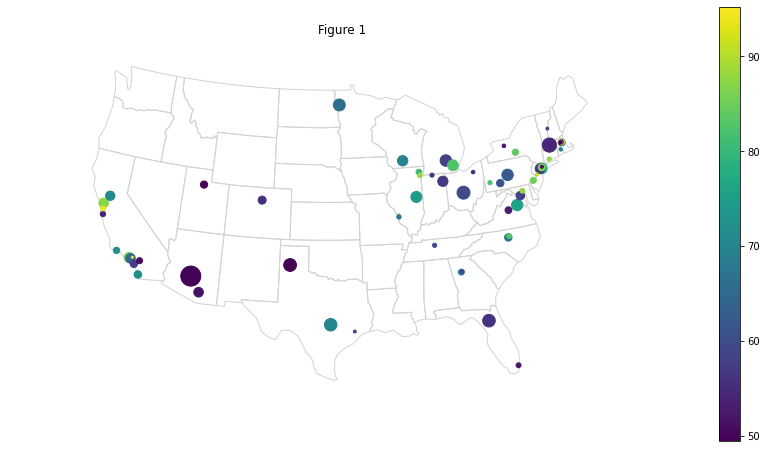

In [41]:
# Draw the US map
ax = gplt.polyplot(
    contiguous_usa,
    figsize=(15, 8),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    edgecolor='lightgray'
)
# Plot the distribution of top US universities
plot1 = gplt.pointplot(geo_df, 
               ax=ax, 
               hue='total_score', 
               scale='num_students', 
               limits=(2, 20),
               legend_var='hue',
               legend=True)

title1 = plt.title('Figure 1')

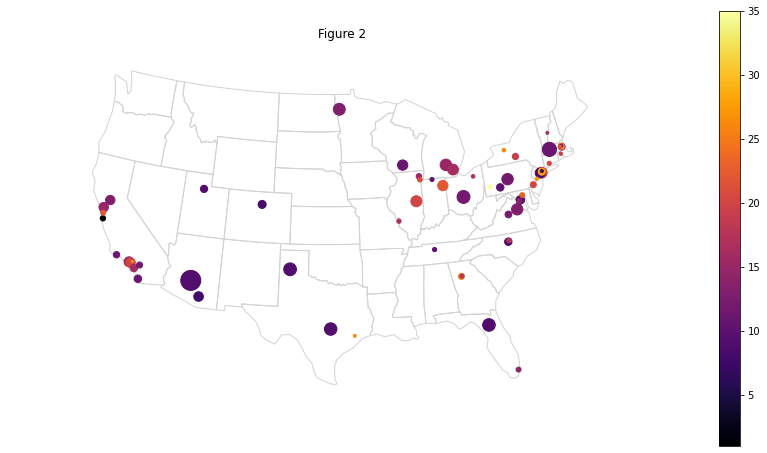

In [42]:
# Draw the US map
ax = gplt.polyplot(
    contiguous_usa,
    figsize=(15, 8),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    edgecolor='lightgray'
)
# Plot the distribution of top US universities
plot2 = gplt.pointplot(geo_df, 
               ax=ax, 
               hue='international_students', 
               scale='num_students', 
               limits=(2, 20),
               legend_var='hue',
               cmap='inferno',
               legend=True)
title2 = plt.title('Figure 2')

#### Answer the subquestions
##### Will do schools cluster together or scatter around?
Based on `figure 1` above, it is clear that the top universities in the US tend to be clustered together and distributed mainly on the *West* and *East* coasts of the United States. In particular, universities with high scores are concentrated in big cities such as *New York*, *Philadelphia*, *San Francisco*, and *Los Angeles*.

The way they are clustered together makes it easier for them to connect, cooperate and develop together. In addition, universities can also cooperate with businesses to create a suitable working and development environment for students. Moreover, this model can develop into high-tech parks, startup playgrounds and achieve many successes like *Silicon Valley*.
##### Does the location affect number of students and ratio of international students?
One thing that is easy to see in `figure 2` is that universities that are located individually tend to have a larger student population than schools that are clustered together, and most of these schools are not located in the big cities. However, schools with a high percentage of international students do the opposite. These schools are located in urban areas, in the group of universities clustered together.

By answering the two sub-questions above, we've answered the larger question of how the top universities in America are distributed. Hopefully, this result will help other universities, especially in *Vietnam*, have a certain perspective on planning and building their infrastructure. As well as working with businesses in big cities like *Ho Chi Minh*, *Da Nang* or *Hanoi* to create a dynamic, creative and successful region like *Silicon Valley* in the US.

### Do founders of unicorn startup come only from top universities (2016)?
Before diving into it, we need to sketch out what are we going to do:
- **Data that will be used and their expected data types**:
  - Dataset: **`IPEDS_data.xlsx`**, **`timesData.csv`**
  - Attributes and expected data types:
      - **`startup_founder_chars.csv`**: 
        - `Standardized University`: string
        - `Standardized Major`: string
      - **`timesData.csv`**: 
        - `university_name`: string
        - `country`: string
        - `teaching`: float
        - `international`: float
        - `research`: float
        - `citations`: float
        - `income`: float
        - `total_score`: float
        - `year`: int
- **General steps**:
  - Preprocess the data.
    - Detect and handle missing values in each table.
    - Detect and handle inappropriate data types in each table.
    - Detect and handle outliers in each table.
  - Analyze the data
    - Filter out the desirable data
    - Find the top 20 universities
    - Get the performance score for each school in the top 20 universities
    - Use KDE plot and Radar chart to visualize the data.
  - Answer the question
    - What are the characteristics of these universities?
    - What is the most common major in these universities?
  
#### Preprocess the data
##### `startup_founder_chars.csv`

In [43]:
# Make a sub df from founder_df
sub_founders_df = founders_df[['Standardized University', 'Standardized Major']]
sub_founders_df.head()

,Standardized University,Standardized Major
0,Indiana University of Pennsylvania,Design
1,NaN,NaN
2,Fordham University,Psychology
3,University of Michigan,Computer Science
4,University of Houston,NaN


In [44]:
# Data summary
sub_founders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Standardized University  505 non-null    object
 1   Standardized Major       444 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


In [45]:
# Percentage of missing values in each column
sub_founders_df.isna().sum() / sub_founders_df.shape[0] * 100

Standardized University    12.020906
Standardized Major         22.648084
dtype: float64

In [46]:
sub_founders_df['Standardized University'].unique()

array(['Indiana University of Pennsylvania', nan, 'Fordham University',
       'University of Michigan', 'University of Houston',
       'Stanford University', 'Carnegie Mellon University',
       'Harvard University', 'San Jose State University',
       'University of Kentucky', 'University of British Columbia',
       'University of Washington',
       'Massachusetts Institute of Technology',
       'University of Maryland College Park',
       'University of Pennsylvania', 'Yale University',
       'Cornell University', 'Clarkson University',
       'Technical University of Catalonia', 'Academy of Art University',
       'University of Leicester', 'University of California Berkeley',
       'Bowdoin College', 'Duke University', 'University of Texas Austin',
       'Brown University', 'Brigham Young University',
       'Washington University in St. Louis',
       'Washington State University', 'New York University',
       'University of Bombay', 'University of California Davis',
   

In [47]:
sub_founders_df['Standardized Major'].unique()

array(['Design', nan, 'Psychology', 'Computer Science',
       'Operations Research', 'Economics', 'Electrical Engineering',
       'Business', 'International Relations', 'Physics',
       'Political Science', 'Engineering', 'Music', 'Mathematics', 'Film',
       'Cognitive Science', 'English', 'Sociology',
       'Mechanical Engineering', 'Architecture', 'History', 'Chemistry',
       'Public Policy', 'Language', 'Desgin', 'Biology', 'Geology',
       'Philosophy', 'Media', 'Opreations Research',
       'Interdisciplinary Degree'], dtype=object)

With the above results, we draw some conclusions as follows:
- The column data types are as expected. So, we don't need to change anything.
- These values look quite fine, there isn't any strange value that occurs in our data.
- Both columns have missing values. We can not fill in these missing values by arbitrary values. Cause, the answer of this question heavily depend on the accuracy of these values. So, we just drop them from the table.
- Moreover, we rename the columns to `university_name` and `major` for convenient.

In [48]:
# Drop missing values
sub_founders_df = sub_founders_df.dropna()
sub_founders_df.reset_index(drop=True, inplace=True)

# Percentage of missing values in each column
sub_founders_df.isna().sum() / sub_founders_df.shape[0] * 100

Standardized University    0.0
Standardized Major         0.0
dtype: float64

In [49]:
# Rename
sub_founders_df.rename({'Standardized University':'university_name', 'Standardized Major':'major'},
                      axis=1,
                      inplace=True)

##### `timesData.csv`

In [50]:
# Make a sub df from timesData
sub2_times_df = times_df[['university_name', 'country', 'teaching', 'international', 'research', 
                         'citations', 'income', 'total_score', 'year']].copy()
sub2_times_df.head()

,university_name,country,teaching,international,research,citations,income,total_score,year
0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,2011
1,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2011
2,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,2011
3,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,2011
4,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,2011


In [51]:
# Data summary
sub2_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  2603 non-null   object 
 1   country          2603 non-null   object 
 2   teaching         2603 non-null   float64
 3   international    2603 non-null   object 
 4   research         2603 non-null   float64
 5   citations        2603 non-null   float64
 6   income           2603 non-null   object 
 7   total_score      2603 non-null   object 
 8   year             2603 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 183.1+ KB


With the above results, we draw some conclusions as follows:
- These columns don't have any missing value.
- There are some columns that have inappropriate data types (`international`, `income`, and `total_score`).

Let's take a look at them before processing anything else.

In [52]:
sub2_times_df['international'].unique()

array(['72.4', '54.6', '82.3', '29.5', '70.3', '77.7', '77.2', '39.6',
       '90.0', '59.2', '48.1', '62.8', '58.5', '62.4', '93.7', '53.3',
       '-', '90.9', '32.9', '39.1', '91.4', '90.8', '49.0', '49.4',
       '60.5', '18.4', '73.2', '32.6', '64.3', '93.3', '21.5', '31.6',
       '55.9', '97.8', '85.9', '88.0', '68.6', '56.4', '77.9', '67.3',
       '97.4', '44.9', '93.9', '44.5', '43.7', '31.2', '100.0', '66.3',
       '22.1', '23.0', '28.3', '22.6', '43.0', '38.1', '31.8', '52.3',
       '43.1', '35.6', '25.2', '56.5', '64.0', '31.7', '67.2', '16.7',
       '89.6', '42.2', '87.5', '20.9', '84.2', '52.2', '36.7', '72.8',
       '74.2', '66.6', '63.4', '22.5', '65.7', '99.5', '79.1', '92.9',
       '56.8', '69.0', '87.9', '24.4', '87.0', '21.9', '91.3', '35.4',
       '31.0', '37.6', '85.3', '24.2', '85.7', '48.0', '26.8', '62.6',
       '34.1', '83.3', '19.9', '71.8', '47.7', '24.8', '29.2', '34.2',
       '63.0', '95.7', '29.6', '50.2', '91.0', '30.4', '24.7', '73.8',
       '

In [53]:
sub2_times_df['income'].unique()

array(['34.5', '83.7', '87.5', '64.3', '-', '57.0', '73.5', '92.9',
       '100.0', '34.7', '59.6', '43.7', '53.7', '56.5', '39.0', '32.8',
       '95.1', '89.8', '42.6', '50.2', '51.8', '40.5', '47.7', '98.6',
       '42.2', '64.1', '30.7', '73.3', '31.7', '29.2', '38.0', '30.3',
       '84.2', '48.0', '53.9', '67.1', '97.8', '29.6', '40.4', '37.9',
       '36.2', '90.8', '52.7', '31.6', '44.1', '29.1', '57.1', '39.1',
       '33.9', '38.4', '30.5', '33.2', '37.7', '43.8', '45.8', '26.1',
       '30.2', '32.6', '44.0', '43.0', '26.7', '32.4', '60.5', '99.8',
       '35.7', '32.7', '97.7', '43.4', '38.9', '95.5', '97.1', '28.8',
       '44.5', '61.0', '73.4', '27.4', '82.3', '79.8', '41.5', '42.5',
       '40.3', '81.4', '26.4', '49.3', '30.0', '55.3', '61.1', '34.8',
       '36.0', '39.5', '57.2', '47.0', '99.4', '31.1', '60.0', '40.0',
       '49.6', '50.1', '37.5', '38.8', '40.6', '61.5', '38.3', '34.2',
       '41.2', '41.6', '29.7', '27.8', '40.8', '29.4', '98.7', '56.6',
       '

Similar to `total_score`, both `international` and `income` columns have strange values (`'-'`) and we can see them as missing values.
In the previous question, we just drop the missing values from `total_score`. But, in this question, we focus on the `university_name`. Hence, we replace the values `'-'` with `'0'` and then change the data type of these columns.

In [54]:
# Fill in missing values
sub2_times_df.replace(to_replace={'total_score':'-', 'income':'-', 'international':'-'}, 
                     value='0', 
                     inplace=True)

# Change to the correct type
sub2_times_df['total_score'] = pd.to_numeric(sub2_times_df['total_score'])
sub2_times_df['income'] = pd.to_numeric(sub2_times_df['income'])
sub2_times_df['international'] = pd.to_numeric(sub2_times_df['international'])

# Recheck the table
sub2_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  2603 non-null   object 
 1   country          2603 non-null   object 
 2   teaching         2603 non-null   float64
 3   international    2603 non-null   float64
 4   research         2603 non-null   float64
 5   citations        2603 non-null   float64
 6   income           2603 non-null   float64
 7   total_score      2603 non-null   float64
 8   year             2603 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 183.1+ KB


Next, does the data have outliers?

In [55]:
sub2_times_df.describe()

,teaching,international,research,citations,income,total_score,year
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,51.827622,35.910257,60.921629,44.877833,27.612447,2014.075682
std,17.604218,22.275823,21.254805,23.073219,24.396057,31.080443,1.685733
min,9.900000,0.000000,2.900000,1.200000,0.000000,0.000000,2011.000000
25%,24.700000,33.200000,19.600000,45.500000,31.400000,0.000000,2013.000000
50%,33.900000,50.200000,30.500000,62.500000,39.500000,0.000000,2014.000000
75%,46.400000,69.000000,47.250000,79.050000,56.000000,54.800000,2016.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,2016.000000


Great! Our data looks fine enough to get on it.
#### Analyze the data
##### Filter out the desirable data
In this question, we will use **2016 Times Ranking**, so we need to filter them out from the original data table.

In [56]:
times_2016_df = sub2_times_df[sub2_times_df['year']==2016].copy()
times_2016_df.reset_index(drop=True, inplace=True)
times_2016_df.head()

,university_name,country,teaching,international,research,citations,income,total_score,year
0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2016
1,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,2016
2,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,2016
3,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,2016
4,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,2016


##### Find the top 20 universities that graduate most founders
In this section, we need to find out the *top 20 universities* and their *most common major*.

General steps:
- Group the data by university name.
- With each university, count the number of founders and find the most common major.
- Sort them in descending and take the top 20 universities.

In [57]:
def common_major(x):
    return x.value_counts().index[0]

In [70]:
# Group the data by university names
top_20_fu = sub_founders_df.groupby(by=['university_name']).agg(['size', common_major])
top_20_fu = top_20_fu['major'].nlargest(20, columns=['size'])
top_20_fu

,size,common_major
university_name,,
Stanford University,30,Computer Science
Harvard University,21,Mathematics
University of Pennsylvania,14,Computer Science
University of California Berkeley,13,Operations Research
Massachusetts Institute of Technology,12,Electrical Engineering
Brigham Young University,9,Business
Cornell University,9,Engineering
Dartmouth College,8,Engineering
University of Texas Austin,8,Computer Science


##### Get the performance score for each school in the top 20 universities
Cause we need to see the *performance of each university*, we filter out these schools from the **2016 Times Ranking**. But, before filtering, we need to handle the *inconsistency of university names* between two tables.

In [59]:
# Set of school names in The Times Ranking
school_names_2016 = set(times_2016_df['university_name'].unique())

In [60]:
# Get the school names from the top 20
top20_names = top_20_fu.index.to_list()

# With each school name in top 20, find the most matching name in the ranking.
extracted_names = []
for name in top20_names:
    extracted_names.append(process.extractOne(name, school_names_2016))
    print(extracted_names[-1])

('Stanford University', 100)
('Harvard University', 100)
('University of Pennsylvania', 100)
('University of California, Berkeley', 99)
('Massachusetts Institute of Technology', 100)
('Cornell University', 100)
('Iran University of Science and Technology', 86)
('University of Texas at Austin', 95)
('Dartmouth College', 100)
('Carnegie Mellon University', 100)
('Columbia University', 100)
('Princeton University', 100)
('Yale University', 100)
('Brown University', 100)
('University of California, Los Angeles', 99)
('University of Michigan', 100)
('University of Illinois at Urbana-Champaign', 96)
('University of Washington', 100)
('Tel Aviv University', 100)
('Indian Institute of Technology Delhi', 100)


As the result above, we clearly see that there is only `Brigham Young University` that is not in The 2016 Times Ranking. So, we just drop the `Brigham Young University` from the table cause we don't have any information about its performance.

In [61]:
# Remove Brigham Young University
top20_names.remove('Brigham Young University')

In [62]:
# Extract the university names after removing Brigham Young University
extracted_names = []
for name in top20_names:
    extracted_names.append(process.extractOne(name, school_names_2016))

In [63]:
# Get the name from the extracted object
top20_names = [name[0] for name in extracted_names]

In [64]:
# Get the performance scores of top 20 universities
top20_df = times_2016_df[times_2016_df['university_name'].isin(top20_names)]
top20_df

,university_name,country,teaching,international,research,citations,income,total_score,year
2,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,2016
4,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,2016
5,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,2016
6,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,2016
11,Yale University,United States of America,86.5,64.3,87.8,97.2,43.3,87.4,2016
12,"University of California, Berkeley",United States of America,80.4,61.9,91.1,99.7,47.9,87.2,2016
14,Columbia University,United States of America,85.9,73.5,82.2,98.1,0.0,86.1,2016
15,"University of California, Los Angeles",United States of America,80.8,56.4,88.6,98.5,47.9,85.8,2016
16,University of Pennsylvania,United States of America,82.0,49.5,86.9,98.6,47.9,85.2,2016
17,Cornell University,United States of America,77.9,63.9,86.1,97.2,33.7,84.0,2016


##### Visualize the data
In this section, we use 2 kind of plots to visualize the data:
- **KDE plot**: distribution of score in each area
- **Radar chart**: a closer look at the top 5 universities

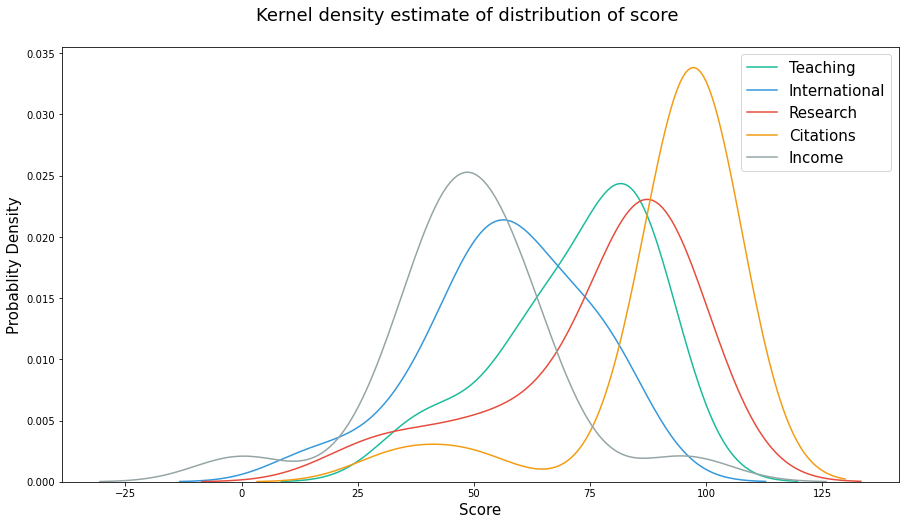

In [65]:
# KDE plot
fig, ax = plt.subplots(figsize=(15,8))
sns.kdeplot(top20_df.teaching, label="Teaching", color = "#1abc9c")
sns.kdeplot(top20_df.international, label="International", color = "#3498db")
sns.kdeplot(top20_df.research, label="Research", color = "#e74c3c")
sns.kdeplot(top20_df.citations, label="Citations", color = "#f39c12")
sns.kdeplot(top20_df.income, label="Income", color = "#95a5a6")

plt.legend(fontsize = 15)
plt.ylabel(ylabel = "Probablity Density", fontsize=15)
plt.xlabel(xlabel=  "Score", fontsize=15)
title = fig.suptitle('Kernel density estimate of distribution of score', fontsize=18, x = 0.5, y = 0.95)

In [66]:
def makeRadarChart(df, row, color, title, idx):
    
    categories= ['Teaching', 'International', 'Research', 'Citations', 'Income']
    N = len(categories)

    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(3,2,idx+1, polar=True)
 
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="black", size=10)
    plt.ylim(0,100)
 
    
    values=df.reset_index().iloc[row, 3:8].values.tolist()
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.5)
 
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)

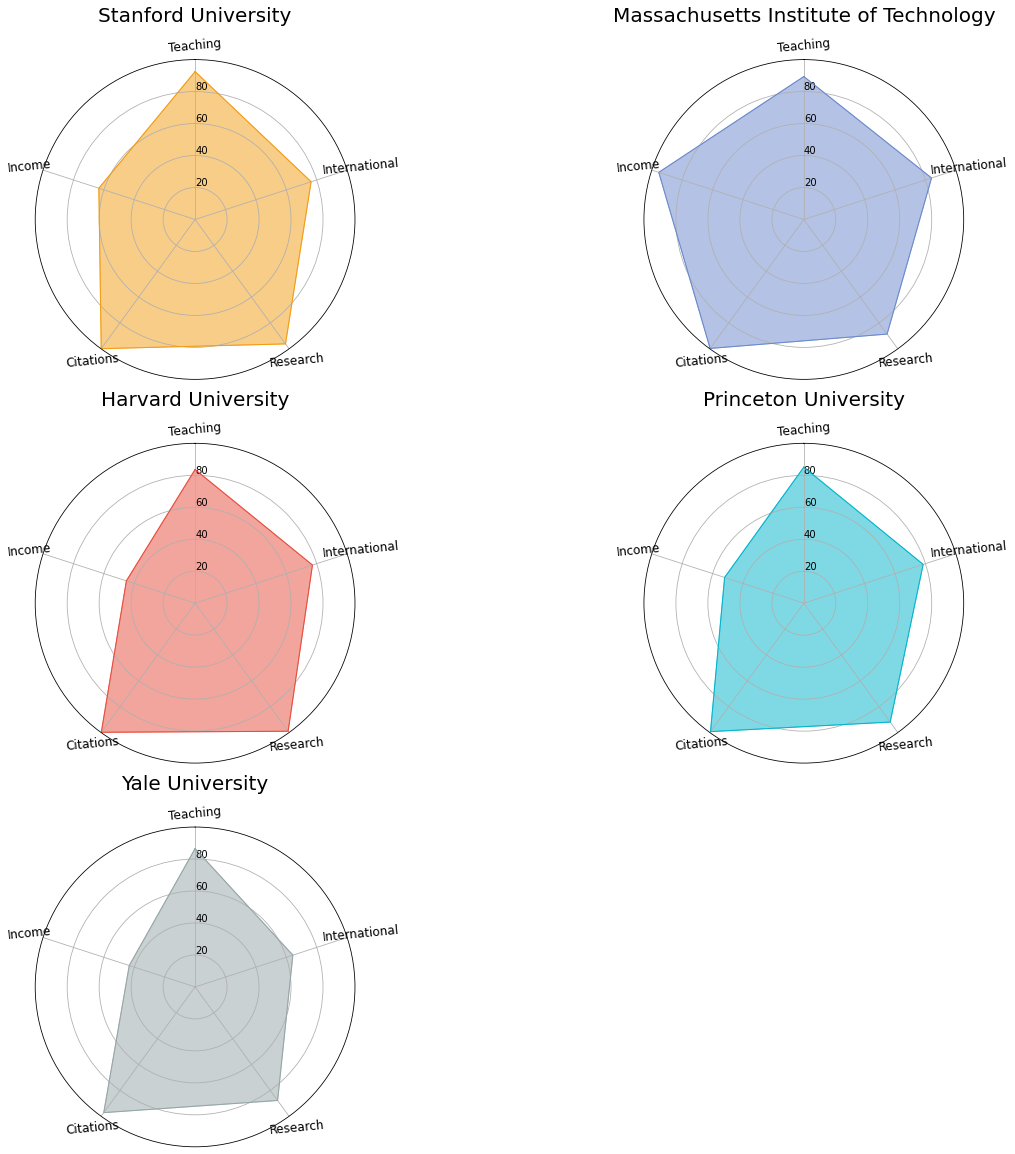

In [67]:
fills = ["#f39c12","#6a89cc", "#e74c3c","#00b5cc","#95a5a6"]
plt.figure(figsize=(20, 20))
for row in range(0, 5):
    makeRadarChart(row=row, df=top20_df, title=top20_df.iloc[row, 0] , color = fills[row], idx=row)

#### Answer the question
##### What are the characteristics of these universities?
The first and most obvious thing is that *18/20* schools are from the **US** and the other two are **Israel** and **India**. All three countries have their own *advanced science and technology*. That could also be the reason for the success of startups.

The second thing is that except for *Brigham Young University*, the remaining **19** schools are in the top of the world. Obviously, the educational environment and the quality of teaching have a great influence on students.

The third characteristic is that these schools are *research-oriented* and famous for *research*. Through *KDE Plot* and *Radar Chart*, we can easily see that these schools all have excellent scores in citations and research.

##### What is the most common major in these universities?
It is not difficult to see that, **Computer Science** is the most popular field of study by founders. From there, the successful startups are mostly associated with science and technology. Learning and grasping new technology is definitely a good key to success.

By answering the small questions, we have the answer to the big question. And that answer is *"not all but almost succesful startup founders come from top universities"*. Through this question, it shows that the importance of promoting scientific research of students in universities. In addition, other universities, especially in *Vietnam*, need to grasp the development trend of technology so that they can train excellent students to serve the country.